### problem 3 ###
<img src = "./image.PNG" style = "height:200px">

* 먼저, 사각형의 중심 부분에 각 반원으로 보이는 부분이 겹치는 부분의 넓이를 구한다  
* 이 경우, 겹치는 부분은 다음과 같이 정삼각형 하나와, 원호 두 개로 구성되어짐을 알 수 있다.  

<img src = "./image2.PNG" style = "height:200px">

* 정삼각형의 넓이는 다음과 같다.  
$$ S = \frac{\sqrt 3}{4} * r^2, r = 1$$

* 그리고, 부채꼴의 넓이를 알면, 원호의 넓이를 포함하여 중간 부분의 총 2개의 초록 영역과, 1개의 빨간 영역, 1개의 파란 영역을 계산할 수 있다.
$$ R + 2G + B = S + 2 * 활꼴  $$
$$ R + 2G + B = \frac{\pi}{3} - \frac{\sqrt 3}{4} $$

* 가운데 영역의 넓이를 알았으니, 이를 이용하여 다음 영역의 넓이를 계산할 수 있다.  

<img src = "./image3.PNG" style = "height:200px">  

$$ R + G = \frac{\sqrt 3}{4} - \frac{\pi}{12} $$

* 위에서 구한 영역의 넓이를 이용하여, 한 개의 R 영역의 넓이를 구할 수 있게 된다.  

$$ R = 1 - \left\{2 * (R + G) + (R + 2G + B)\right\} $$
$$ R = 1 - \frac{\sqrt 3}{4} - \frac{\pi}{6} $$

* R의 넓이와, 위의 수식을 이용하여 G 및 B를 계산하면, 다음과 같다.  

$$ G = \frac{\sqrt 3}{2} + \frac{\pi}{12} - 1 $$
$$ B = \frac{\pi}{3} - \sqrt 3 + 1 $$

* 따라서, 문제에서 요구하는 답은 다음과 같다.  
$$ RED\; area = 4 * R = \left\{1 - \frac{\sqrt 3}{4} - \frac{\pi}{6}\right\} $$
$$ BLUE\; area = B = \frac{\pi}{3} - \sqrt 3 + 1 $$
$$ GREEN\; area = 4 * G = 4 * \left\{ \frac{\sqrt 3}{2} + \frac{\pi}{12} - 1 \right\} $$

In [1]:
## 위 수식 총합 검증 ##

import numpy as np

r = 1 - 1/4*np.sqrt(3) - 1/6*np.pi
g = 1/2*np.sqrt(3) + 1/12*np.pi - 1
b = 1/3*np.pi - np.sqrt(3) + 1

In [6]:
total = 4*r + 4*g + b
print(r, g, b, total)

0.043388522509481886 0.12782479158358795 0.31514674362772044 0.9999999999999998


#### 1. 불량 약병 찾기
- 각각 100개의 약이 들어 있는 20개의 약병이 있다.  
- 한개의 약병을 제외하고 나머지 약병의 약들은 1g 이다.  
- 한개는 약들이 1.1g이다.  
- 저울을 한 번만 재서 그 약병을 찾는 방법은?

#### 1. 답안
* n 번쨰 병에 대하여, n개의 알약을 제거한다.  
* 이후, 알약을 제거한 20개의 약병을 모두 저울을 이용하여 무게를 측정한다.
* 그렇게 되면, 1.1g의 무게를 가지는 알약이 몇 개 제외되었는지 알 수 있으므로, 약병을 찾을 수 있다.

#### 2. 농구 공 넣기
- 내가 농구 공을 넣을 확률은 $p$ 이다.
- 나는 다음 두 종류 중 어떤 것을 선택해야 할 것인가?
    - 슛을 한번만 할 수 있다.  
    - 세번 던져서 두번 이상을 넣어야 한다.

#### 2번 답안 ####

* 한 번 던져서 성공할 확률은 p이다.  
* 3 번 던져서 2 번 이상 성공할 확률은 다음과 같다.  

$$ _3C_2 p^2(1-p) + \;_3C_3p^3 \qquad ( 0 \le p \le 1)$$  

* 따라서, 위 조건을 그래프로 그리면 다음 코드로 나타낼 수 있다.

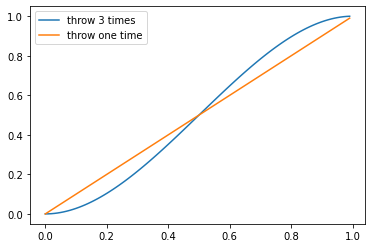

In [30]:
import numpy
import matplotlib.pyplot as plt

p = np.arange(0, 1, 0.01)
y = 3 * p**2 * (1 - p) + p**3



plt.plot(p, y, label = "throw 3 times")
plt.plot(p, p , label = "throw one time")
plt.legend()
plt.show()


* 그래프에서 확인할 수 있듯, 성공확률 p는 0.5를 기준으로, 0.5보다 낮은 경우 한 번만 던지는 것이 좋으며, 0.5를 초과하는 경우 3번 던지는 것이 성공률이 높은 것을 확인할 수 있었다.

In [29]:
# test case
def y(p) :
    return (3 * p**2) - 2*(p**3)

y(0.5)

0.5

### 3. 원판 뒤집기
- size가 다른 원판의 stack이 있다.
- flip 기계에 입력 n을 넣으면 n번째의 원판부터 맨위까지를 뒤집는다.
- 큰 원판부터 차례로 쌓는 방법
- input: 
    - prob3case.txt 각 line에 원판의 크기가 나열되어 있다. (첫번째 숫자가 맨 위임)
- output:
    - 각 line에 대한 뒤집는 회수, 뒤집는 번호를 차례대로 (0-based index)

#### 3. 답안 ####
* 먼저, 가장 큰 사이즈를 가지는 원판의 index를 찾는다.
* 찾은 원판을 기준으로, flip을 진행한 뒤, 전체를 flip하는 과정을 반복합니다.
* 결과적으로, 큰 원판부터 차례대로 정렬되게 되며, 모든 원판이 정렬된 경우 함수를 종료합니다.

In [ ]:


def swap(index, input) :
    print(input)
    input_a = input[0:index]
    input_b = input[index:]
    input_b.reverse()
    print(input_a, input_b)
    return input_a + input_b

def max_index_finder(input, counter, answer) :
    max = -1
    max_number = answer[counter]
    

    for idx, i in enumerate(input) :
        if i == max_number :
            print("max_number(index) : ", max_number, "(" , idx, ")")
            return idx

    
    return True
    


def temp(input, counter, answer) :
    
    if input == answer :
        return input, counter
    else :
        index = max_index_finder(input, counter, answer)
        
        
        input = swap(index, input)
        input = swap(counter, input)
        
        
        return temp(input, counter+1, answer)





In [ ]:
input = [[1],
[1, 2],
[1, 3, 2],
[4, 3, 2, 5, 1],
[4, 3, 2, 1],
[2, 5, 7, 6, 4, 8],
[5, 4, 3, 2, 1]]

for i in input :
    input_arr = i
    counter = 0
    counter = 0 # 뒤집는 횟수
    answer = input_arr.copy()
    answer.sort()
    answer.reverse()    

    print("new array sort start !!! ")
    result, counter = temp(input_arr, counter, answer)
    print("result : ", result, "\t counter : ", counter)






new array sort start !!! 
result :  [1] 	 counter :  0
new array sort start !!! 
max_number(index) :  2 ( 1 )
[1, 2]
[1] [2]
[1, 2]
[] [2, 1]
result :  [2, 1] 	 counter :  1
new array sort start !!! 
max_number(index) :  3 ( 1 )
[1, 3, 2]
[1] [2, 3]
[1, 2, 3]
[] [3, 2, 1]
result :  [3, 2, 1] 	 counter :  1
new array sort start !!! 
max_number(index) :  5 ( 3 )
[4, 3, 2, 5, 1]
[4, 3, 2] [1, 5]
[4, 3, 2, 1, 5]
[] [5, 1, 2, 3, 4]
max_number(index) :  4 ( 4 )
[5, 1, 2, 3, 4]
[5, 1, 2, 3] [4]
[5, 1, 2, 3, 4]
[5] [4, 3, 2, 1]
result :  [5, 4, 3, 2, 1] 	 counter :  2
new array sort start !!! 
result :  [4, 3, 2, 1] 	 counter :  0
new array sort start !!! 
max_number(index) :  8 ( 5 )
[2, 5, 7, 6, 4, 8]
[2, 5, 7, 6, 4] [8]
[2, 5, 7, 6, 4, 8]
[] [8, 4, 6, 7, 5, 2]
max_number(index) :  7 ( 3 )
[8, 4, 6, 7, 5, 2]
[8, 4, 6] [2, 5, 7]
[8, 4, 6, 2, 5, 7]
[8] [7, 5, 2, 6, 4]
max_number(index) :  6 ( 4 )
[8, 7, 5, 2, 6, 4]
[8, 7, 5, 2] [4, 6]
[8, 7, 5, 2, 4, 6]
[8, 7] [6, 4, 2, 5]
max_number(index) : 